---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

In [2]:
G_df = pd.read_csv('Employee_Movie_Choices.txt',sep="\t")
print(len(pd.unique(G_df['#Employee'])))
print(len(pd.unique(G_df['Movie'])))
G_df.head()

8
11


,#Employee,Movie
0,Andy,Anaconda
1,Andy,Mean Girls
2,Andy,The Matrix
3,Claude,Anaconda
4,Claude,Monty Python and the Holy Grail


### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [3]:
def answer_one():
        
    B = nx.Graph()
    B.add_nodes_from(G_df['#Employee'])
    B.add_nodes_from(G_df['Movie'])
    B.add_edges_from([(row['#Employee'], row['Movie']) for idx, row in G_df.iterrows()])
    return B
print(len(answer_one().edges()))
print(len(answer_one().nodes()))
nodeset1, nodeset2 = bipartite.sets(answer_one())
print(nodeset1)
print(nodeset2)

24
19
{'Frida', 'Andy', 'Joan', 'Vincent', 'Pablo', 'Georgia', 'Lee', 'Claude'}
{'Monty Python and the Holy Grail', 'Mean Girls', 'The Social Network', 'The Matrix', 'Forrest Gump', 'The Shawshank Redemption', 'Kung Fu Panda', 'The Dark Knight', 'The Godfather', 'Snakes on a Plane', 'Anaconda'}


### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [4]:
def answer_two():
    
    B=answer_one()
    add=dict()
    for i in range(19):
        if i<8:
            add[B.nodes()[i]]='employee'
        else:
            add[B.nodes()[i]]="movie"
    nx.set_node_attributes(B, "type", add)
    return B
answer_two().nodes(data=all)

[('Andy', {'type': 'employee'}),
 ('Claude', {'type': 'employee'}),
 ('Frida', {'type': 'employee'}),
 ('Georgia', {'type': 'employee'}),
 ('Joan', {'type': 'employee'}),
 ('Lee', {'type': 'employee'}),
 ('Pablo', {'type': 'employee'}),
 ('Vincent', {'type': 'employee'}),
 ('Anaconda', {'type': 'movie'}),
 ('Mean Girls', {'type': 'movie'}),
 ('The Matrix', {'type': 'movie'}),
 ('Monty Python and the Holy Grail', {'type': 'movie'}),
 ('Snakes on a Plane', {'type': 'movie'}),
 ('The Shawshank Redemption', {'type': 'movie'}),
 ('The Social Network', {'type': 'movie'}),
 ('Forrest Gump', {'type': 'movie'}),
 ('Kung Fu Panda', {'type': 'movie'}),
 ('The Dark Knight', {'type': 'movie'}),
 ('The Godfather', {'type': 'movie'})]

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

[('Frida', 'Vincent', {'weight': 2}), ('Frida', 'Andy', {'weight': 1}), ('Frida', 'Pablo', {'weight': 2}), ('Andy', 'Joan', {'weight': 1}), ('Andy', 'Pablo', {'weight': 1}), ('Andy', 'Georgia', {'weight': 1}), ('Andy', 'Lee', {'weight': 1}), ('Andy', 'Claude', {'weight': 1}), ('Joan', 'Lee', {'weight': 3}), ('Vincent', 'Pablo', {'weight': 1}), ('Georgia', 'Claude', {'weight': 3})]
{'weight': 1}


<IPython.core.display.Javascript object>


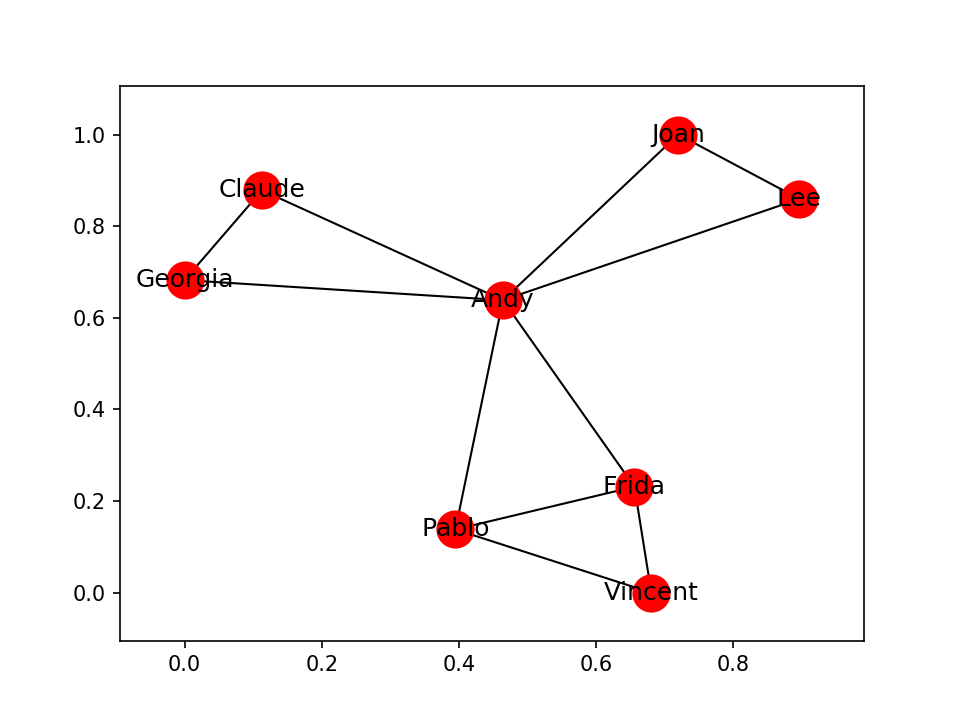

In [5]:
def answer_three():
        
    B=answer_two()
    X=set(B.nodes()[:8]) 
    l=bipartite.weighted_projected_graph(B,X)
    return l
print(answer_three().edges(data=True))
print(answer_three().edge["Joan"]["Andy"])
plot_graph(answer_three())

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [8]:
def answer_four():
        
    a1=pd.read_csv('Employee_Relationships.txt',sep="\t",header=None)
    a2=answer_three()
    s=[]
    for i in range(len(a1)):
        item_1=a1[0].iloc[i]
        item_2=a1[1].iloc[i]
        try:
            answer=a2.edge[item_1][item_2]["weight"]
        except:
            answer=0
        s.append(answer)
    a1[3]=s
    return a1[[2,3]].corr()[2][3] 
answer_four()

0.78839622217334759